In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.data.shape

(569, 30)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(cancer.data)
data_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.model_selection import train_test_split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(data_scaled,
                                                            cancer.target,
                                                             stratify =cancer.target,
                                                             shuffle = True,
                                                             random_state = 144)

In [6]:
rf_orig = RandomForestClassifier(oob_score=True)
rf_orig = rf_orig.fit(X_train_orig,y_train)
print("Traning set score {:.3f}".format(rf_orig.score(X_train_orig,y_train)))
print("Test set score {:.3f}".format(rf_orig.score(X_test_orig,y_test)))
print("OOB set score {:.3f}".format(rf_orig.oob_score_))

Traning set score 0.993
Test set score 0.944
OOB set score 0.932


C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_scaled)
data_reduced = pca.transform(data_scaled)
print("Original Shape: {} ".format(str(data_scaled.shape)))
print("Reduced Shape: {} ".format(str(data_reduced.shape)))


Original Shape: (569, 30) 
Reduced Shape: (569, 5) 


In [8]:
df = pd.DataFrame(data_reduced,columns=['component1','component2','component3','component4','component5'])
df['target'] = cancer.target 

In [9]:
df.shape

(569, 6)

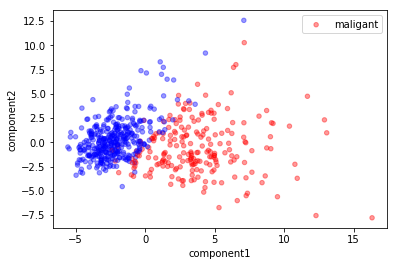

In [10]:
df.plot(kind="scatter",x="component1", y="component2", alpha=0.4, label="maligant", color=np.where(df['target'] == 0 , 'r', 'b'))

In [11]:
from sklearn.model_selection import train_test_split
X_train_pca , X_test_pca = train_test_split(df.drop('target', axis=1), stratify=df['target'],
                                             shuffle = True, random_state=144)

In [12]:
rf_pca = RandomForestClassifier(oob_score=True)
rf_pca = rf_pca.fit(X_train_pca, y_train)
print("Training Set score: {:.3f} ".format(rf_pca.score(X_train_pca,y_train)))
print("Test Score: {:.3f} ".format(rf_pca.score(X_test_pca,y_test)))
print("OOB Score: {:.3f} ".format(rf_pca.oob_score))

Training Set score: 0.998 
Test Score: 0.958 
OOB Score: 1.000 


C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [13]:
pred_orig = rf_orig.predict(X_test_orig)
confusion = confusion_matrix(y_test, pred_orig)
print("Confusion Matrix \n {}".format(confusion))

Confusion Matrix 
 [[51  2]
 [ 6 84]]


In [14]:
pred_pca = rf_pca.predict(X_test_pca)
confusion = confusion_matrix(y_test, pred_pca)
print("Confusion Matrix \n {}".format(confusion))

Confusion Matrix 
 [[51  2]
 [ 4 86]]


In [18]:
from sklearn import svm
from sklearn.metrics import f1_score
svm_model = svm.LinearSVC(C=100.0).fit(X_train_orig,y_train)
pred_svm = svm_model.predict(X_test_orig)
print(f1_score(y_test,pred_svm))
pred_orig = svm_model.predict(X_test_orig)
confusion_matrix(y_test,pred_orig)

0.9497206703910613


C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[49,  4],
       [ 5, 85]], dtype=int64)

In [20]:
svm_model_pca = svm.LinearSVC(C=100.0).fit(X_train_pca,y_train)
pred_svm_pca = svm_model_pca.predict(X_test_pca)
print(f1_score(y_test,pred_svm_pca))
confusion_matrix(y_test,pred_pca)

0.9782608695652174


C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[51,  2],
       [ 4, 86]], dtype=int64)

In [21]:
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(X_train_orig, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_orig, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_orig, y_test)))
pred_svm = svm_model.predict(X_test_orig)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Train set accuracy: 0.99
Test set accuracy: 0.97
Confusion matrix:
[[49  4]
 [ 1 89]]


In [22]:
svm_model = svm.LinearSVC(C=30.0)
svm_model.fit(X_train_pca, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_pca, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_pca, y_test)))
pred_svm = svm_model.predict(X_test_pca)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Train set accuracy: 0.97
Test set accuracy: 0.98
Confusion matrix:
[[51  2]
 [ 1 89]]


C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
def plot_pca_accuracy(model,train,test,ytrain,ytest):
    components = []
    scores = []
    for c in range(5,25):
        pca = PCA(n_components=c,whiten=True, random_state=0).fit(train)
        Xtrain = pca.transform(train)
        Xtest = pca.transform(test)
        model.fit(Xtrain, ytrain)
        score = model.score(Xtest,ytest)
        scores.append(score)
        components.append(c)
    plt.plot(components,scores,label="train accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("components")

C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


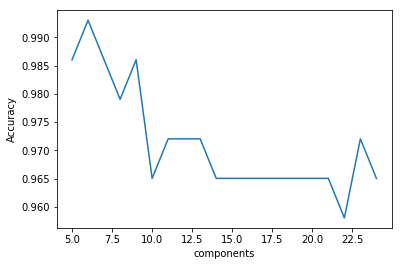

In [24]:
plot_pca_accuracy(svm.LinearSVC(C=1.0),X_train_orig,X_test_orig,y_train,y_test)

In [25]:
pca = PCA(n_components=6, whiten=True, random_state=0).fit(X_train_orig)
Xtrain = pca.transform(X_train_orig)
Xtest = pca.transform(X_test_orig)
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(Xtrain, y_train)
print(svm_model.score(Xtest,y_test))
pred_svm = svm_model.predict(Xtest)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

0.993006993006993
Confusion matrix:
[[52  1]
 [ 0 90]]


C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\avinash.t\Anaconda3\lib\site-packages\sklearn\ensemble\forest

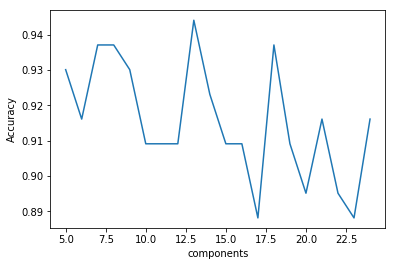

In [26]:
plot_pca_accuracy(RandomForestClassifier(oob_score=True),X_train_orig,X_test_orig,y_train,y_test)

In [ ]:
pca = PCA(n_components=6, whiten=True, random_state=0).fit(X_train_orig)
Xtrain = pca.transform(X_train_orig)
Xtest = pca.transform(X_test_orig)
rf_model = RandomForestClassifier(n_estimators=2000)
rf_model.fit(Xtrain, y_train)
print(rf_model.score(Xtest,y_test))
pred_rf = rf_model.predict(Xtest)
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion matrix:\n{}".format(confusion))